In [301]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit


In [302]:
energias=np.array([511,661.7,1173.2,1274.5,1332.5])
canales=np.array([1290.79,1661.56,2873.01,3132.70,3256.57])

In [303]:
def E(canal,a0,a1):
    return a1*canal+a0




In [304]:
fit1=curve_fit(E,np.round(canales),energias)
args=fit1[0]
errorargs=np.sqrt(np.diag(fit1[1]))

def canal(E):
    return (E-args[0])/args[1]

In [305]:

canal(511)
E(1295,*args)

510.93893346845965

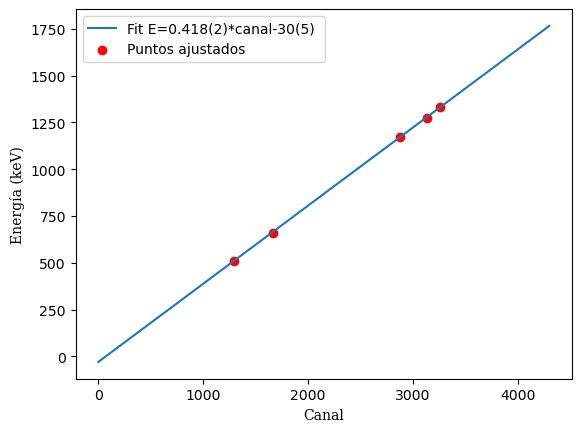

In [306]:
x=np.linspace(0,4300)
y=E(x,*args)
plt.plot(x,y,label=f"Fit E={args[1]:.3f}({errorargs[1]*10**3:.0f})*canal{args[0]:.0f}({errorargs[0]:.0f}) ")
plt.scatter(canales,energias,color="r",label="Puntos ajustados")
plt.xlabel("Canal",family="serif")
plt.ylabel("Energía (keV)",family="serif")
plt.legend()

In [308]:
for i in np.append(energias,32.8):
    a=round(canal(i))
    b=E(a,*args)
    c=i-b
    d=c/i
    d=100*d
    print(f"E={i} canal={a} E_ajuste={b:.4f} DeltaE={c:.4f} %={d:.9f}")


E=511.0 canal=1295 E_ajuste=510.9389 DeltaE=0.0611 %=0.011950398
E=661.7 canal=1656 E_ajuste=661.7406 DeltaE=-0.0406 %=-0.006129328
E=1173.2 canal=2880 E_ajuste=1173.0458 DeltaE=0.1542 %=0.013144556
E=1274.5 canal=3123 E_ajuste=1274.5549 DeltaE=-0.0549 %=-0.004308723
E=1332.5 canal=3262 E_ajuste=1332.6198 DeltaE=-0.1198 %=-0.008991071
E=32.8 canal=150 E_ajuste=32.6346 DeltaE=0.1654 %=0.504229755
